In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


FileNotFoundError: ignored

In [0]:
import pickle as pkl
path = 'drive/My Drive/Colab NoteBooks'
with open(path+'test.pickle', 'wb') as f:
  pkl.dump('4',f)

In [0]:
!ls



drive  sample_data


In [2]:
cd drive/


/content/drive


In [3]:
!ls

'My Drive'


In [4]:
cd My\ Drive

/content/drive/My Drive


In [5]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [0]:

data = pd.read_csv('ner_dataset.csv', encoding='latin1')
data = data.fillna(method='ffill')

In [0]:
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [7]:
words = list(set(data['Word'].values))
words.append('ENDPAD')
print(len(words))
words[:10]

35179


['likes',
 'ex-husband',
 'Volodymyr',
 'mines',
 'mimics',
 'duty-free',
 'Ethiopia',
 'Urumqi',
 'iTunes',
 'champions']

In [8]:
tags = list(set(data['Tag'].values))

print(len(tags))
tags[:10]

17


['I-per',
 'B-tim',
 'B-nat',
 'I-geo',
 'B-gpe',
 'I-gpe',
 'B-eve',
 'B-per',
 'B-art',
 'I-org']

In [0]:
class SentenceGetter(object):
    """Class to Get the sentence in this format:
    [(Token_1, Part_of_Speech_1, Tag_1), ..., (Token_n, Part_of_Speech_1, Tag_1)]"""
    def __init__(self, data):
        """Args:
            data is the pandas.DataFrame which contains the above dataset"""
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    

In [0]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [11]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [0]:
word2idx = {w : i+1 for i, w in enumerate(words)} #padding will come so i+1
tag2idx = {t : i for i, t in enumerate(tags)} #no padding

In [0]:
word2idx, tag2idx

In [0]:
idx2word = { value:key for (key, value) in word2idx.items()}
idx2tag = {value:key for (key,value) in tag2idx.items()}

In [51]:
idx2word, idx2tag

({1: 'likes',
  2: 'ex-husband',
  3: 'Volodymyr',
  4: 'mines',
  5: 'mimics',
  6: 'duty-free',
  7: 'Ethiopia',
  8: 'Urumqi',
  9: 'iTunes',
  10: 'champions',
  11: 'Karami',
  12: 'hour',
  13: '73-year-old',
  14: 'U.N.-proposed',
  15: 'African-Union',
  16: 'months',
  17: 'attitude',
  18: 'Hogg',
  19: 'Realtors',
  20: 'throats',
  21: 'Laszlo',
  22: 'universe',
  23: 'imprisoning',
  24: 'Kazimierz',
  25: '87.61',
  26: 'longest-serving',
  27: '950',
  28: 'resembled',
  29: 'Bahrain',
  30: '32-million-barrel-a-day',
  31: 'Eight-time',
  32: 'corvettes',
  33: 'Colleagues',
  34: 'dock',
  35: 'Charm',
  36: 'Svetlana',
  37: 'Crimea',
  38: 'Kumble',
  39: 'tourniquet',
  40: 'maybe',
  41: 'van',
  42: 'Norma',
  43: 'painful',
  44: 'Islamists',
  45: 'bloody',
  46: 'machinery',
  47: 'Abbassid',
  48: 'degradation',
  49: 'reassert',
  50: 'before',
  51: 'downplayed',
  52: '224',
  53: 'Kai',
  54: 'principles',
  55: 'reasonably',
  56: 'Mendonca',
  57: 'Leew

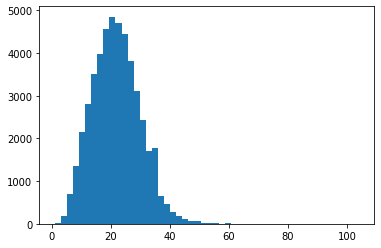

In [14]:
#include padding and define maximum size of sentence
plt.hist([len(s) for s in sentences], bins =50)
plt.show()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [0]:
max_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=max_len, sequences=X, padding="post",)

# Convert Tag/Label to tag_index
y = [[tag2idx[w[2]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
y = [to_categorical(i, num_classes=len(tags)) for i in y] 

In [17]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

print('Raw Sample: ', ' '.join([w[0] for w in sentences[0]]))
print('Raw Label: ', ' '.join([w[2] for w in sentences[0]]))

Raw Sample:  Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .
Raw Label:  O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O


In [28]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D


# Model definition
input_word= Input(shape=(max_len,))
model = Embedding(input_dim=len(words), output_dim=max_len, input_length=max_len,)(input_word)  
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
out = TimeDistributed(Dense(17, activation="softmax"))(model)  # a dense layer as suggested by neuralNer


model = Model(input_word, out)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])



In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [0]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=1, mode='max')
model_checkpoint = ModelCheckpoint('NER_checkpoint.h5', save_best_only=True)

In [32]:
history = model.fit(X_tr, np.array(y_tr), validation_data=(X_te,np.array(y_te)), batch_size=32, epochs=5, callbacks=[early_stopping, model_checkpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 43163 samples, validate on 4796 samples
Epoch 1/5
43163/43163 [==============================] - 250s 6ms/step - loss: 0.1710 - accuracy: 0.9603 - val_loss: 0.0637 - val_accuracy: 0.9813
Epoch 2/5
43163/43163 [==============================] - 242s 6ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 3/5
43163/43163 [==============================] - 241s 6ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0473 - val_accuracy: 0.9856
Epoch 4/5
43163/43163 [==============================] - 245s 6ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0475 - val_accuracy: 0.9859
Epoch 5/5
43163/43163 [==============================] - 241s 6ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0480 - val_accuracy: 0.9858


In [33]:
loadModel = tf.keras.models.load_model('NER_checkpoint.h5')

In [34]:
loadModel.evaluate(X_te,np.array(y_te))

150/150 [==============================] - 3s 23ms/step - loss: 0.0473 - accuracy: 0.9856


[0.047324832528829575, 0.9855838418006897]

In [0]:
pick = 84
p = loadModel.predict(np.array([X_tr[pick]]))
p = np.argmax(p, axis=-1)[0]

In [106]:
print(p, X_tr[pick])

[14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 11  9 14 14  9 14 14 14
 14 14 14 14 14 14 14 14 12  3 14 12  3  3 14 14 12  3 14 14 14 14 14 14
 14 14] [29590 32965 13171 27242  1182 12352 19256 16994 10890 15381  3509 15381
 13410 15381 27965 19256 14187 10676 30085  4962 27023 30786 15381 26917
 26285 19256  7578 20297 26917 16994 14510 30085 15559 16452 15381  2702
 19256   576 15381 26917   339 16452 30786  4069     0     0     0     0
     0     0]


In [107]:
original = np.argmax(y_tr, axis=-1)[pick]
print(original)

[14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 12  3 14 12  3  3 14 14 12  3 14 14 14 14 14 14
 14 14]


In [108]:
words = []
[[words.append(idx2word.get(i))] for i in X_tr[pick]]

predictedTags = []
[[predictedTags.append(idx2tag.get(i))] for i in p]

originaLTags = []
[[originaLTags.append(idx2tag.get(i))] for i in original]


[[None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None],
 [None]]

In [109]:
#print
for i, j, z in zip(words, tags, originaLTags): 
  print ('{:15}\t\t{:15}\t\t{:15}'.format(i,j,z))

Other          		O              		O              
economic       		B-per          		O              
activity       		I-org          		O              
includes       		O              		O              
the            		O              		O              
exploitation   		O              		O              
of             		O              		O              
natural        		O              		O              
resources      		B-org          		O              
,              		O              		O              
e.g.           		B-geo          		O              
,              		O              		O              
fishing        		O              		O              
,              		O              		O              
dredging       		O              		O              
of             		O              		O              
aragonite      		O              		O              
sands          		O              		O              
(              		O              		O              
The            		O              		O              


TypeError: ignored